<a href="https://colab.research.google.com/github/heysourin/NLP-101/blob/main/LSTM/Fake%20News/LSTM_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud # For text visualization

In [2]:
fake = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

In [3]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [4]:
fake['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

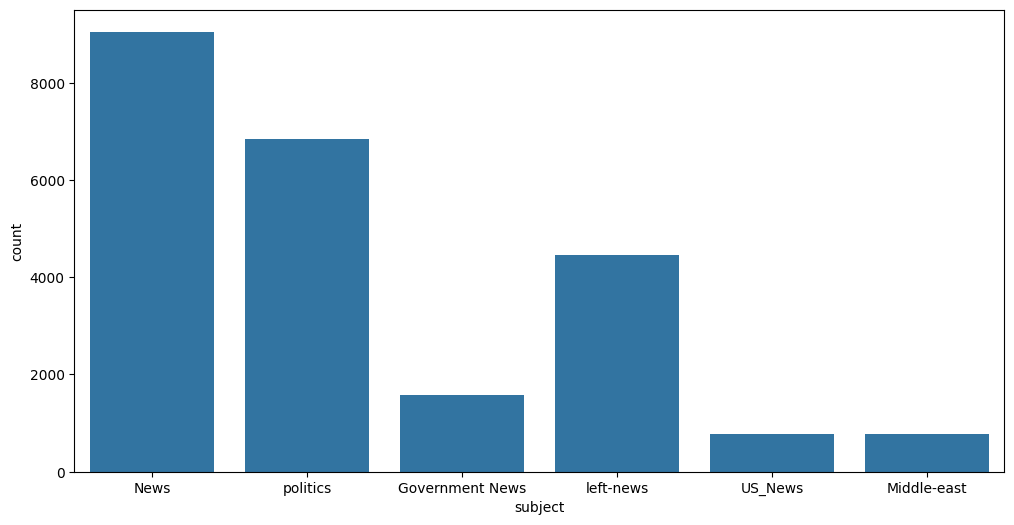

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x='subject', data=fake)

In [6]:
fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
text = ' '.join(fake['text'].tolist())

In [8]:
print(text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



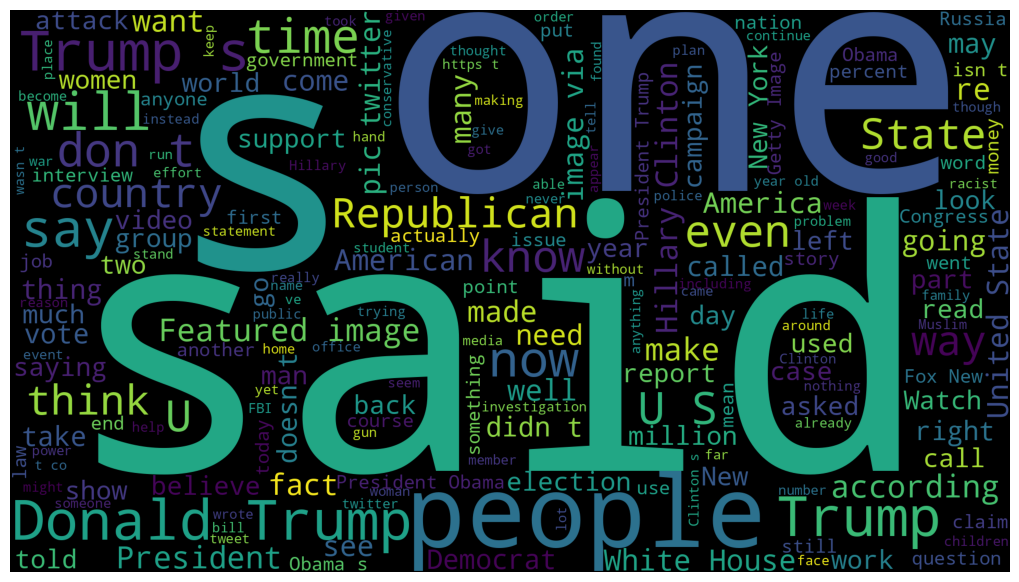

In [9]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Exploring Real news



In [10]:
real = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [11]:
text = ' '.join(real['text'].tolist())

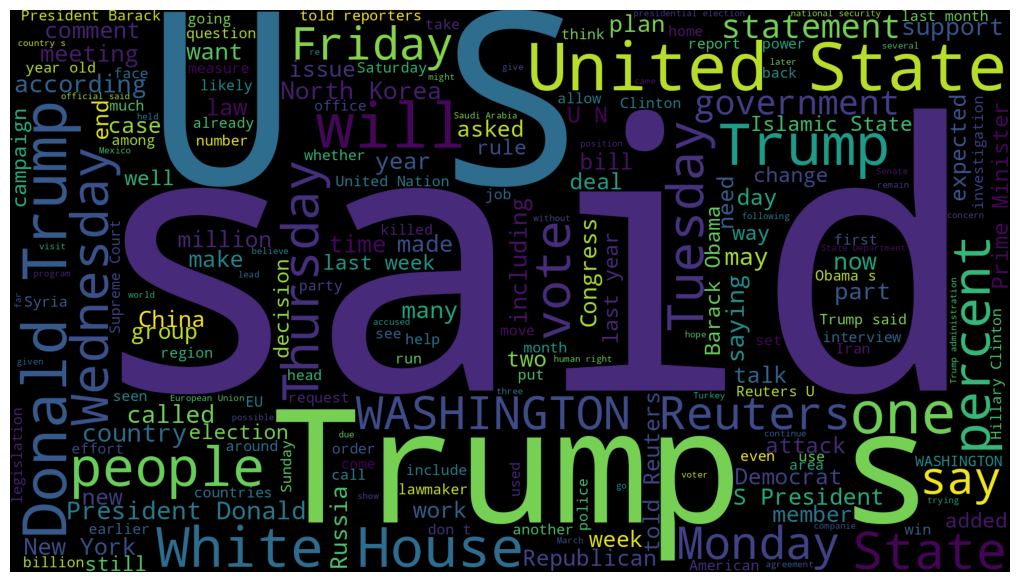

In [12]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Data Cleaning

In [13]:
real.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [14]:
real.sample(5)

,title,text,subject,date
4039,"Manufacturers, Wall Street getting Trump's ear...",WASHINGTON (Reuters) - Manufacturers and Wall ...,politicsNews,"April 27, 2017"
17805,Cambodia's Hun Sen renews criticism of United ...,PHNOM PENH (Reuters) - Cambodian Prime Ministe...,worldnews,"October 11, 2017"
16740,"Islamic State killed more than 60, dozens miss...",BEIRUT (Reuters) - Islamic State killed more t...,worldnews,"October 23, 2017"
9804,Boston mayor says not subject of federal probe...,"BOSTON (Reuters) - Boston Mayor Martin Walsh, ...",politicsNews,"April 25, 2016"
11654,Australian police say car that hit pedestrians...,SYDNEY (Reuters) - A car was deliberately driv...,worldnews,"December 21, 2017"


In [15]:
real.text.values

array(['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support

In [16]:
real.sample(10)

,title,text,subject,date
9373,Mississippi governor to join suit against Obam...,(Reuters) - Mississippi’s Republican governor ...,politicsNews,"May 26, 2016"
3793,Trump reassures farmers immigration crackdown ...,WASHINGTON/SAN FRANCISCO (Reuters) - President...,politicsNews,"May 15, 2017"
10337,How Rubio’s campaign failed: problems from the...,MIAMI (Reuters) - Marco Rubio had all that you...,politicsNews,"March 16, 2016"
1882,"Mexico, El Salvador, Guatemala urge protection...",MEXICO CITY (Reuters) - Mexico and Central Ame...,politicsNews,"September 5, 2017"
2424,Republicans try to pick up the pieces after he...,WASHINGTON (Reuters) - The seven-year Republic...,politicsNews,"July 27, 2017"
5409,Senate confirms Mulvaney as Trump's budget dir...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"February 16, 2017"
18123,Final tally in New Zealand's inconclusive elec...,WELLINGTON (Reuters) - A final tally in New Ze...,worldnews,"October 6, 2017"
12582,India's Rahul Gandhi takes helm of Congress pa...,NEW DELHI (Reuters) - India s main opposition ...,worldnews,"December 11, 2017"
4174,Democrats urge FCC to drop plan to revise TV o...,WASHINGTON (Reuters) - The top Democrat in the...,politicsNews,"April 19, 2017"
18508,Deadly twin suicide attack hits Damascus polic...,BEIRUT (Reuters) - Two suicide bombers struck ...,worldnews,"October 2, 2017"


In [17]:
unknown_publishers = []
for i, row in enumerate(real.text.values): #real.text.values --> array of text data
  try:
    record = row.split('-', maxsplit=1)
    record[1]

    assert(len(record[0]) < 120)
  except:
    unknown_publishers.append(i)

In [18]:
len(unknown_publishers) # Number of unknown publishers

222

In [19]:
real.iloc[unknown_publishers]['text']

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [20]:
publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)

    publisher.append('Unknown')

  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [21]:
real['publishers'] = publisher
real['text'] = tmp_text

In [22]:
real.head()

,title,text,subject,date,publishers
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [23]:
real.shape

(21417, 5)

In [24]:
fake['text'].isna().sum()

0

In [25]:
empty_fake_index = [index for index, text in enumerate(fake.text.tolist()) if str(text).strip() == ""]

In [26]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [27]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [28]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

# Text preprocessing


In [29]:
real['class'] = 1
fake['class'] = 0

In [30]:
real.head()

,title,text,subject,date,publishers,class
0,"As U.S. budget fight looms, Republicans flip t...","as u.s. budget fight looms, republicans flip t...",politicsNews,"December 31, 2017",WASHINGTON (Reuters),1
1,U.S. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,politicsNews,"December 29, 2017",WASHINGTON (Reuters),1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,senior u.s. republican senator: 'let mr. muell...,politicsNews,"December 31, 2017",WASHINGTON (Reuters),1
3,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped by australian diplomat...,politicsNews,"December 30, 2017",WASHINGTON (Reuters),1
4,Trump wants Postal Service to charge 'much mor...,trump wants postal service to charge 'much mor...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters),1


In [31]:
# We are only gonna work with 'text' and 'class' columns from both the datasets
real = real[['text', 'class']]
fake = fake[['text', 'class']]

In [32]:
data = pd.concat([real, fake])

# Reset the index of the merged DataFrame
data.reset_index(drop=True, inplace=True)

In [33]:
data.shape

(44898, 2)

In [34]:
data.sample(5)

,text,class
43610,trump rally in austin tx – protesters largely ...,0
22661,"watch: colbert goes there, calls for a new el...",0
27875,see how trump wants to screw over minimum wag...,0
12355,muslim leaders call on world to recognize east...,1
20776,ukraine president hopes to secure defensive we...,1


In [35]:
data['class'].value_counts()

class
0    23481
1    21417
Name: count, dtype: int64

In [36]:
X = data['text']
y = data['class']

In [37]:
X

0        as u.s. budget fight looms, republicans flip t...
1        u.s. military to accept transgender recruits o...
2        senior u.s. republican senator: 'let mr. muell...
3        fbi russia probe helped by australian diplomat...
4        trump wants postal service to charge 'much mor...
                               ...                        
44893    mcpain: john mccain furious that iran treated ...
44894    justice? yahoo settles e-mail privacy class-ac...
44895    sunnistan: us and allied ‘safe zone’ plan to t...
44896    how to blow $700 million: al jazeera america f...
44897    10 u.s. navy sailors held by iranian military ...
Name: text, Length: 44898, dtype: object

In [38]:
y

0        1
1        1
2        1
3        1
4        1
        ..
44893    0
44894    0
44895    0
44896    0
44897    0
Name: class, Length: 44898, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35918,), (8980,), (35918,), (8980,))

In [41]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [43]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

134120

In [44]:
# max_length = max([len(seq) for seq in train_sequences])
max_length = 100
padded_sequences = pad_sequences(train_sequences, maxlen=max_length, padding='post')

In [45]:
#Model
import keras
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense

In [46]:
embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           6706000   
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 6735505 (25.69 MB)
Trainable params: 6735505 (25.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
history = model.fit(padded_sequences, y_train, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


898/898 [==============================] - 340s 372ms/step - loss: 0.1131 - accuracy: 0.9623 - val_loss: 0.0395 - val_accuracy: 0.9873
Epoch 2/3
898/898 [==============================] - 306s 341ms/step - loss: 0.0412 - accuracy: 0.9889 - val_loss: 0.0563 - val_accuracy: 0.9819
Epoch 3/3
898/898 [==============================] - 310s 346ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0579 - val_accuracy: 0.9869


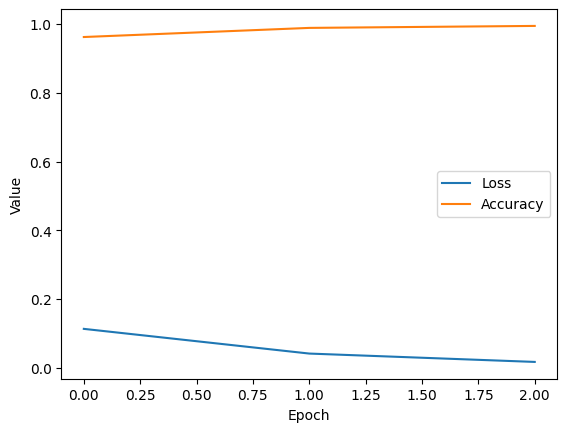

In [49]:
import matplotlib.pyplot as plt

# Retrieve loss and accuracy from history
loss_per_epoch = history.history['loss']
accuracy_per_epoch = history.history['accuracy']

# Plot loss
plt.plot(range(len(loss_per_epoch)), loss_per_epoch, label='Loss')

# Plot accuracy
plt.plot(range(len(accuracy_per_epoch)), accuracy_per_epoch, label='Accuracy')

# Set labels and legend
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

# Show plot
plt.show()


In [50]:
# X_test is already tokenized above
X_test_padded = pad_sequences(test_sequences, maxlen=max_length)

# Ensure y_test is one-hot encoded if needed
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test, num_classes=vocab_size)

In [ ]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

In [ ]:
predictions = model.predict(y_test)
predictions